In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim 


# Datos

In [ ]:
# Datos de entrada (2 características)
X = torch.tensor([[0.0, 0.0], 
                  [0.0, 1.0], 
                  [1.0, 0.0], 
                  [1.0, 1.0]])

# Etiquetas de salida (AND)
Y = torch.tensor([[0.0], 
                  [0.0], 
                  [0.0], 
                  [1.0]])

# Perceptrón

In [ ]:
# Definición del modelo del Perceptrón, se define una clase y se hereda de nn.Module
class Perceptron(nn.Module):
    # Llama al constructor de nn.Module, obligatorio para cualquier definicion de modelos
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(2, 1)  # Capa completamente conectada (2 entradas -> 1 salida)
    
    def forward(self, x):
        return torch.sigmoid(self.fc(x))  # Activación sigmoide

# Crear el modelo
model = Perceptron()

# Definir función de pérdida y optimizador
criterion = nn.BCELoss()  # Binary Cross Entropy para clasificación binaria
optimizer = optim.SGD(model.parameters(), lr=0.1)



## Entrenamiento

In [ ]:
# Entrenamiento
epochs = 20000
for epoch in range(epochs):
    optimizer.zero_grad()  # Resetear gradientes
    output = model(X)      # Forward pass
    loss = criterion(output, Y)  # Cálculo de la pérdida
    loss.backward()        # Backpropagation
    optimizer.step()       # Actualizar pesos
    
    if epoch % 200 == 0:
        print(f"Época {epoch}, Pérdida: {loss.item():.4f}")

Época 0, Pérdida: 0.0158
Época 100, Pérdida: 0.0157
Época 200, Pérdida: 0.0156
Época 300, Pérdida: 0.0154
Época 400, Pérdida: 0.0153
Época 500, Pérdida: 0.0151
Época 600, Pérdida: 0.0150
Época 700, Pérdida: 0.0149
Época 800, Pérdida: 0.0148
Época 900, Pérdida: 0.0146
Época 1000, Pérdida: 0.0145
Época 1100, Pérdida: 0.0144
Época 1200, Pérdida: 0.0143
Época 1300, Pérdida: 0.0142
Época 1400, Pérdida: 0.0140
Época 1500, Pérdida: 0.0139
Época 1600, Pérdida: 0.0138
Época 1700, Pérdida: 0.0137
Época 1800, Pérdida: 0.0136
Época 1900, Pérdida: 0.0135
Época 2000, Pérdida: 0.0134
Época 2100, Pérdida: 0.0133
Época 2200, Pérdida: 0.0132
Época 2300, Pérdida: 0.0131
Época 2400, Pérdida: 0.0130
Época 2500, Pérdida: 0.0129
Época 2600, Pérdida: 0.0128
Época 2700, Pérdida: 0.0127
Época 2800, Pérdida: 0.0126
Época 2900, Pérdida: 0.0125
Época 3000, Pérdida: 0.0124
Época 3100, Pérdida: 0.0123
Época 3200, Pérdida: 0.0123
Época 3300, Pérdida: 0.0122
Época 3400, Pérdida: 0.0121
Época 3500, Pérdida: 0.0120
Époc

## Inferencia

In [11]:
# Prueba del perceptrón entrenado
with torch.no_grad():
    predictions = model(X)#.round()  # Redondear para obtener 0 o 1 (importante)
    print("\nPredicciones:")
    print(predictions)


Predicciones:
tensor([[3.9934e-07],
        [6.5339e-03],
        [6.5339e-03],
        [9.9085e-01]])


# Analisis

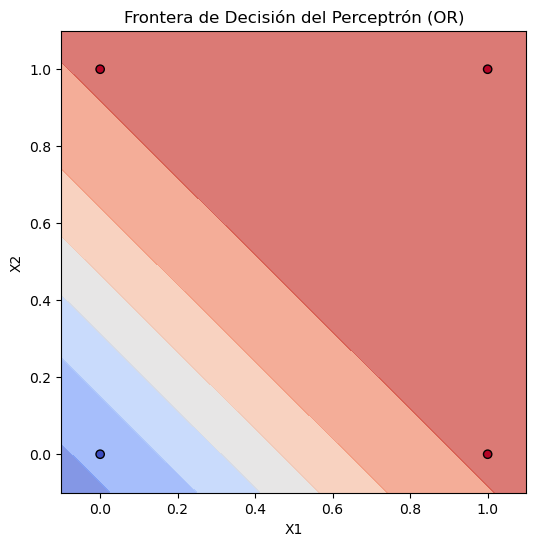

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Datos de la compuerta lógica OR
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)  # OR

# Definir el modelo del Perceptrón
class Perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(2, 1)  # 2 entradas -> 1 salida
    
    def forward(self, x):
        return torch.sigmoid(self.fc(x))  # Activación sigmoide

# Inicializar modelo, función de pérdida y optimizador
model = Perceptron()
criterion = nn.BCELoss()  # Binary Cross Entropy
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Entrenamiento
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

# 📌 Graficar la frontera de decisión
x1_min, x1_max = -0.1, 1.1
x2_min, x2_max = -0.1, 1.1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))

grid = torch.tensor(np.c_[xx1.ravel(), xx2.ravel()], dtype=torch.float32)
preds = model(grid).detach().numpy().reshape(xx1.shape)

plt.figure(figsize=(6, 6))
plt.contourf(xx1, xx2, preds, alpha=0.7, cmap="coolwarm")  # Frontera de decisión
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], edgecolors='k', cmap="coolwarm")  # Puntos de datos
plt.title("Frontera de Decisión del Perceptrón (OR)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


Época 0, Pérdida: 0.6161
Época 100, Pérdida: 0.4207
Época 200, Pérdida: 0.1717
Época 300, Pérdida: 0.0695
Época 400, Pérdida: 0.0382
Época 500, Pérdida: 0.0251
Época 600, Pérdida: 0.0183
Época 700, Pérdida: 0.0142
Época 800, Pérdida: 0.0115
Época 900, Pérdida: 0.0096


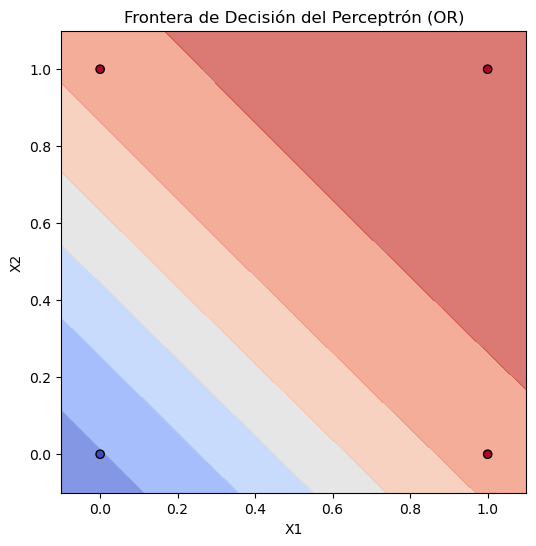

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Definimos la clase del perceptrón, heredando de nn.Module
class Perceptron(nn.Module):
    def __init__(self, input_size, hidden_size):
        """
        Constructor del perceptrón.
        
        Parámetros:
        - input_size: Número de entradas (cantidad de características de cada muestra).
        - hidden_size: Número de neuronas en la capa oculta.
        """
        
        super().__init__()  # Inicializa nn.Module para registrar parámetros
        
        # Definimos la capa oculta (fully connected)
        self.hidden = nn.Linear(input_size, hidden_size)  
        self.f_hidden = nn.Tanh()

        # Definimos la capa de salida con 1 neurona (para regresión o clasificación binaria)
        self.output = nn.Linear(hidden_size, 1)
        self.f_output = lambda x: x  # Función identidad (no aplicamos transformación)

    def forward(self, x):
        """
        Define el flujo de datos a través de la red neuronal.
        
        Parámetro:
        - x: Tensor de entrada (muestra o batch de datos)
        
        Retorna:
        - La predicción del modelo (salida de la capa final)
        """
        x = self.f_hidden(self.hidden(x))  # Aplicamos la capa oculta + activación Tanh
        x = self.f_output(self.output(x))  # Aplicamos la capa de salida sin activación
        return x  # Devolvemos la salida final del modelo


# 📌 Datos de la compuerta lógica OR
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)  # OR

# Crear el modelo con los tamaños adecuados
input_size = X.shape[1]  # Número de características de entrada (columnas del dataset)
hidden_size = 3  # Número de neuronas en la capa oculta

model = Perceptron(input_size, hidden_size)  # Instanciamos el modelo

# 📌 Definir función de pérdida y optimizador
criterion = nn.BCEWithLogitsLoss()  # Binary Cross Entropy con logits
optimizer = optim.SGD(model.parameters(), lr=0.1)

# 📌 Entrenamiento del modelo
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()  # Resetear gradientes
    output = model(X)  # Forward pass
    loss = criterion(output, y)  # Calcular pérdida
    loss.backward()  # Backpropagation
    optimizer.step()  # Actualizar pesos

    if epoch % 100 == 0:
        print(f"Época {epoch}, Pérdida: {loss.item():.4f}")

# 📌 Visualización de la frontera de decisión
x1_min, x1_max = -0.1, 1.1
x2_min, x2_max = -0.1, 1.1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))

grid = torch.tensor(np.c_[xx1.ravel(), xx2.ravel()], dtype=torch.float32)
preds = model(grid).detach().numpy().reshape(xx1.shape)

plt.figure(figsize=(6, 6))
plt.contourf(xx1, xx2, preds, alpha=0.7, cmap="coolwarm")  # Frontera de decisión
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], edgecolors='k', cmap="coolwarm")  # Puntos de datos
plt.title("Frontera de Decisión del Perceptrón (OR)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
